# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

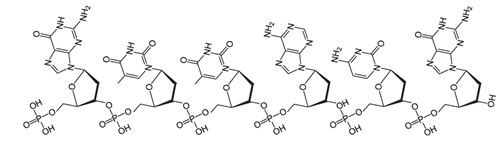

```markdown
GCATTG
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUA ACC AAU AUG CAA GUA CAU GCA – 5’


```markdown
ITNMQVHA
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGGGAAAUUUAU
UGGGAGAUUUAU
UGGGAAAUCUAU
UGGGAGAUCUAU
UGGGAAAUAUAU
UGGGAGAUAUAU
UGGGAAAUUUAC
UGGGAGAUUUAC
UGGGAAAUCUAC
UGGGAGAUCUAC
UGGGAAAUAUAC
UGGGAGAUAUAC
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [7]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.

```markdown
Le format FASTA est un format de fichier texte utilisé pour stocker des séquences biologiques de nature nucléique ou protéique. Ces séquences sont représentées par une suite de lettres codant des acides nucléiques ou des acides aminés selon la nomenclature IUPAC.
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
Triplet de nucléotides désigné par les initiales des noms des trois bases respectives, qui détermine la synthèse cellulaire des acides aminés.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Le codons de START est unique c'est `AUG`. Il code l'acide aminé `Méthionine`. Il definit le début d'une séquence de protéine à l'intérieur de l'ARN
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Les codons de STOP sont `UAA`, `UAG`, `UGA`. Ils ne codent aucun acide aminé. Ils definissent la fin d'une séquence de protéine à l'intérieur de l'ARN
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Il est lu de 3' à 5'
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
L'ADN est constitué de 2 brin constitué de nucléotides, structuré en forme d'hélice.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
Les 2 brins peuvent porter un gène
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
Le cadre de lecture est un triplet de nucléotide constituant l'ADN et l'ARN. Il y en a 3 fois moins qu'il y a de nucléotide dans la séquence traité.
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
On l'utilise lorsque l'on veut transcrire une séquence ADN vers une séquence peptidique.
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [45]:
f = open("ncbi_dataset/data/GCF_000838645.1/GCF_000838645.1_ViralProj14060_genomic.fna", "r")

virus = "".join([i.replace("\n", "") for i in f.readlines()][1:])
allseq = []
i = 0
while i < len(virus):
    if i + 2 < len(virus) and "".join(virus[i:i+3]) == "ATG":
        seq = ""
        j = i
        cordon = virus[j:j+3]
        while j + 2 < len(virus) and genecode[cordon] != "_":
            seq += genecode[cordon]
            j += 3
            cordon = virus[j:j+3]
        if j + 2 < len(virus2):
            allseq.append((i, j, "+", seq))
    i += 1
    
virus2 = "".join([('C' if i == 'G' else ('G' if i == 'C' else ('A' if i =='T' else 'T'))) for i in reversed(virus)])
i = 0
while i < len(virus2):
    if i + 2 < len(virus2) and "".join(virus2[i:i+3]) == "ATG":
        seq = ""
        j = i
        cordon = virus2[j:j+3]
        while j + 2 < len(virus2) and genecode[cordon] != "_":
            seq += genecode[cordon]
            j += 3
            cordon = virus2[j:j+3]
        if j + 2 < len(virus2):
            allseq.append((i, j, "-", seq))
    i += 1
for (start, end, direct, seq) in allseq:
    print(f"> {start}, {end}, {direct}\n{seq}")

> 238, 268, +
MWSRWVFKPE
> 320, 2183, +
MPGFYEIVIKVPSDLDEHLPGISDSFVNWVAEKEWELPPDSDMDLNLIEQAPLTVAEKLQRDFLTEWRRVSKAPEALFFVQFEKGESYFHMHVLVETTGVKSMVLGRFLSQIREKLIQRIYRGIEPTLPNWFAVTKTRNGAGGGNKVVDECYIPNYLLPKTQPELQWAWTNMEQYLSACLNLTERKRLVAQHLTHVSQTQEQNKENQNPNSDAPVIRSKTSARYMELVGWLVDKGITSEKQWIQEDQASYISFNAASNSRSQIKAALDNAGKIMSLTKTAPDYLVGQQPVEDISSNRIYKILELNGYDPQYAASVFLGWATKKFGKRNTIWLFGPATTGKTNIAEAIAHTVPFYGCVNWTNENFPFNDCVDKMVIWWEEGKMTAKVVESAKAILGGSKVRVDQKCKSSAQIDPTPVIVTSNTNMCAVIDGNSTTFEHQQPLQDRMFKFELTRRLDHDFGKVTKQEVKDFFRWAKDHVVEVEHEFYVKKGGAKKRPAPSDADISEPKRVRESVAQPSTSDAEASINYADRYQNKCSRHVGMNLMLFPCRQCERMNQNSNICFTHGQKDCLECFPVSESQPVSVVKKAYQKLCYIHHIMGKVPDACTACDLVNVDLDDCIFEQ
> 421, 442, +
MGVAARF
> 446, 2183, +
MDLNLIEQAPLTVAEKLQRDFLTEWRRVSKAPEALFFVQFEKGESYFHMHVLVETTGVKSMVLGRFLSQIREKLIQRIYRGIEPTLPNWFAVTKTRNGAGGGNKVVDECYIPNYLLPKTQPELQWAWTNMEQYLSACLNLTERKRLVAQHLTHVSQTQEQNKENQNPNSDAPVIRSKTSARYMELVGWLVDKGITSEKQWIQEDQASYISFNAASNSRSQIKAALDNAGKIMSLTKTAPDYLVGQQPVEDISSNRIYKILELNGYDPQYAASVFLGWATKKFGKRNTIWLFGPATTGKTNI

Q10.	Combien d’ORFS trouvez-vous ?

In [46]:
print(len(allseq))

117


Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

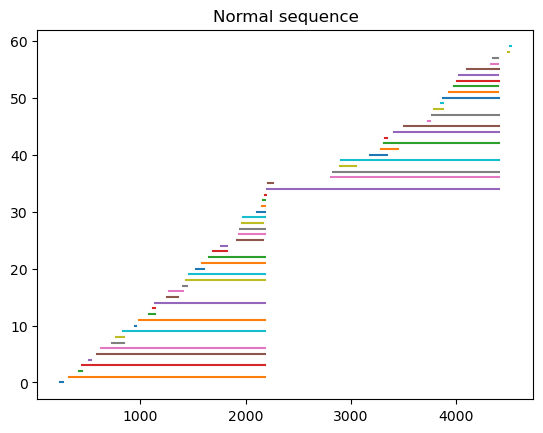

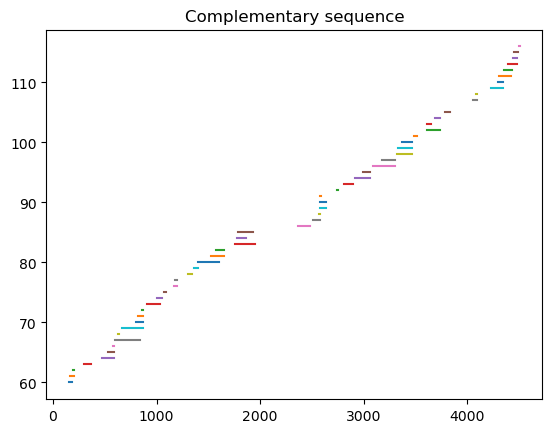

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(len(allseq)):
    if allseq[i][2] == "+":
        plt.plot([allseq[i][0], allseq[i][1]], [i,i])

plt.title("Normal sequence")
plt.show()

for i in range(len(allseq)):
    if allseq[i][2] == "-":
        plt.plot([allseq[i][0], allseq[i][1]], [i,i])
plt.title("Complementary sequence")
plt.show()

Q12. En considérant que les différentes probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

$P_{START} = p_A * p_T * p_G$

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

$P_{STOP} = p_T * (p_A^2 + (p_A * p_G)^2)$

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

In [49]:
probStart = []
for i in range(250, len(virus) - 250):
    pa = virus[i-250:i+250].count('A') / len(virus[i-250:i+250])
    pt = virus[i-250:i+250].count('T') / len(virus[i-250:i+250])
    pg = virus[i-250:i+250].count('G') / len(virus[i-250:i+250])
    probStart.append((i-250, i+250, pa * pt * pg))
#print(probStart)

Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [58]:
import csv

with open("ncbi_dataset/data/ncbi_dataset.tsv") as csvfile:
    file = csv.reader(csvfile, delimiter="\t")
    data = [i for i in file]

headers = data[0]
data = data[1:]

for line in data:
    for seq in allseq:
        if seq[0] == line[1] and seq[2] == "+":
            print(line)
            print(seq)

Q16. Qu’observez-vous ?

```markdown
Aucun des genes de la base de donné correspond à mes genes.
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [ ]:
#Votre code ici

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

In [ ]:
#Votre code ici

Q4. Ces heatmaps sont-elles similaires ?

```markdown
Votre réponse ici
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [ ]:
#Votre code ici

Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [ ]:
 #Votre code ici